# G0W0 approximation

In this note, we explore some properties of the G0W0 approximation

## 1. RPA interaction
$$
W_0=\frac{v_q}{1-v_q\Pi_0},
$$
where $v_q$ is the Coulomb interaction, and $\Pi_0$ is the polarization of free electrons.

In [1]:
using Revise
using ElectronGas
using GreenFunc
using LaTeXStrings
using Plots, Parameters

In [2]:
beta = 1000.0
rs = 1.0
d = 2
para=Parameter.rydbergUnit(1/beta, rs, d);

Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()


In [3]:
# sigma = SelfEnergy.G0W0(para, minK = 1e-6, Nk=12, order=4);
# Nk, order, minK, rtol = 11, 8, 1e-8, 1e-10
Nk, order, minK, rtol = 8, 8, 1e-7, 1e-10
sigma = SelfEnergy.G0W0(para, 100*para.EF, rtol, Nk, 10 * para.kF, minK * para.kF, order, :rpa)
sigma_wn = GreenFunc.toMatFreq(sigma);
dlr = sigma_wn.dlrGrid
kgrid = sigma_wn.spaceGrid
kFidx = searchsortedfirst(kgrid.grid, para.kF);

### 1.1 Frequency-dependent Self-energy (dynamic part only)

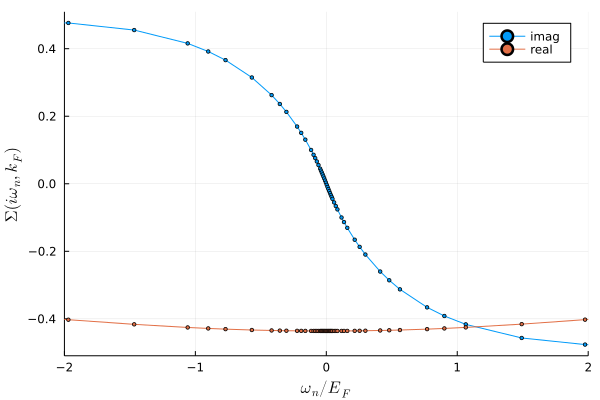

In [8]:
plot(dlr.ωn/para.EF, imag(sigma_wn.dynamic[1, 1, kFidx, :]),marker=2, label="imag", xlabel=L"$\omega_n/E_F$", ylabel=L"$\Sigma(i\omega_n, k_F)$", xlims=(-2, 2))
plot!(dlr.ωn/para.EF, real(sigma_wn.dynamic[1, 1, kFidx, :]),marker=2, label="real")

### 1.2 Momentum-dependent Self-energy (instant + dynamic)

47
-1.8006326323142126, -1.8006232505919049 - 3.1140812186430085e-7im
-1.8006326323142126, -1.8006232505919049 - 3.1140812186430085e-7im


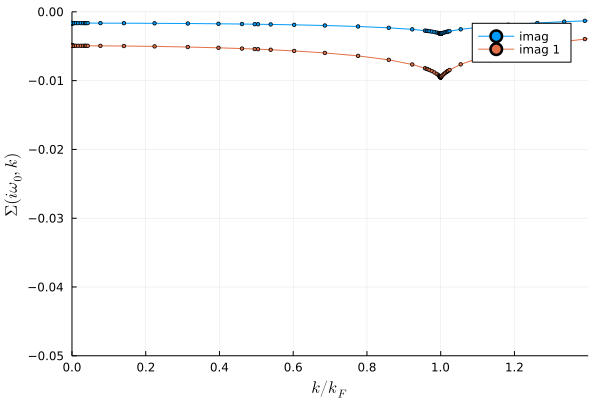

In [15]:
widx = searchsortedfirst(dlr.n, 0)
println(widx)
#println(imag(sigma_wn.dynamic[1, 1, :, widx]))

sig = sigma_wn.dynamic[1, 1, :, widx].+sigma_wn.instant[1, 1, :]
println("$(-para.kF*2*para.e0^2/π), $(sigma_wn.instant[1,1,kFidx])")
plot(kgrid.grid/para.kF, imag(sigma_wn.dynamic[1, 1, :, widx]), xlim=(0.0,1.4), ylim=(-0.05,0.0),marker=2, label="imag", xlabel=L"$k/k_F$", ylabel=L"$\Sigma(i\omega_0, k)$")
#plot!(kgrid.grid/para.kF, real(sig), marker=2, label="real")
#plot!(kgrid.grid/para.kF, real(sigma_wn.dynamic[1, 1, :, widx]), marker=2, label="real dynamic")
#plot!(kgrid.grid/para.kF, real(sigma_wn.instant[1, 1, :]), marker=2, label="real instant")

sig = sigma_wn.dynamic[1, 1, :, widx+1].+sigma_wn.instant[1, 1, :]
println("$(-para.kF*2*para.e0^2/π), $(sigma_wn.instant[1,1,kFidx])")
plot!(kgrid.grid/para.kF, imag(sig), xlim=(0.0,1.4), ylim=(-0.05,0.0),marker=2, label="imag 1", xlabel=L"$k/k_F$", ylabel=L"$\Sigma(i\omega_0, k)$")
#plot!(kgrid.grid/para.kF, real(sig), marker=2, label="real 1")
#plot!(kgrid.grid/para.kF, real(sigma_wn.dynamic[1, 1, :, widx+1]), marker=2, label="real dynamic 1")
#plot!(kgrid.grid/para.kF, real(sigma_wn.instant[1, 1, :]), marker=2, label="real instant 1")

### 1.3 Z-factor and Effective mass

Quasiparticle effective mass can be extracted from the quasiparticle propagator,
$$G(k, i\omega)=\frac{-1}{i\omega-k^2/{2m}+\mu+\Sigma(k, i\omega)}$$
Near the Fermi surface, 
$$Re\Sigma(k, i\omega)=Re\Sigma(k_F, 0)+\frac{\partial Re\Sigma(k_F, 0)}{\partial k} (k-k_F) + ...$$
and,
$$Im\Sigma(k, i\omega)=Im\Sigma(k_F, 0^+)\cdot \text{sgn}(\omega)+\frac{\partial Im\Sigma(k_F, 0^+)}{\partial \omega}\cdot \omega  + ...$$
so that the quasiparticle propagator is renormalized to the form,
$$G(k, i\omega) = \frac{-z}{i\omega-v_F^*(k-k_F)+i\eta \cdot \text{sgn}(\omega)}$$
the wave-function renormalization factor,
$$z=\frac{1}{1+\frac{\partial Im\Sigma(k_F, 0^+)}{\partial \omega}}=\lim_{T\rightarrow 0} \frac{1}{1+\frac{\Sigma(i\omega_2, k_F)-\Sigma(i\omega_1, k_F)}{i2\pi T}}$$
and the quasiparticle life time,
$$\eta = z\cdot Im\Sigma(k_F, 0^+)$$
and the effective mass,
$$\frac{m}{m^*}=z \cdot \left(1-\frac{m}{k_F}\frac{\partial Re\Sigma(k_F, 0)}{\partial k}\right)$$

rs = 1 has Z factor = 0.6626560160213353


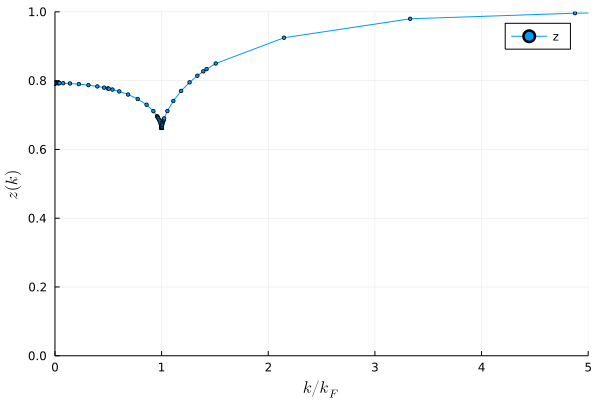

In [19]:
w0idx = searchsortedfirst(dlr.n, 0)
#println(dlr.ωn[w0idx])
# zfactor_wn = @. 1 / (1 + imag(sigma_wn.dynamic[1, 1, :, w0idx+1]-sigma_wn.dynamic[1, 1, :, w0idx]) / (2π) * para.β)
zfactor_wn = @. 1 / (1 - imag(sigma_wn.dynamic[1, 1, :, w0idx]) / π * para.β)
zfactor = zfactor_wn[kFidx]
println("rs = 1 has Z factor = ", zfactor)
plot(kgrid.grid/para.kF, zfactor_wn,marker=2, label="z", xlim=(0.0,5), ylim=(0,1), xlabel=L"$k/k_F$", ylabel=L"$z(k)$")

In [21]:
zfactor = []
mass = []
zfactor_n = []
rslist = [0.2, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0]
plt =plot(xlims=(0.0, 6.01), ylims=(0.0, 1.0), legend = :bottomright)
for _rs in rslist
    param = Parameter.rydbergUnit(1.0/beta/2, _rs, d)
    @unpack me, β, kF = param
    Nk, order, minK, rtol = 8, 8, 1e-7, 1e-10
    sigma = SelfEnergy.G0W0(param, minK = minK, Nk=Nk, order=order);
    sigma_wn = GreenFunc.toMatFreq(sigma);
    dlr = sigma_wn.dlrGrid
    kgrid = sigma_wn.spaceGrid
    kFidx = searchsortedfirst(kgrid.grid, kF)
    #println(kgrid.grid[kFidx]-kF)
    w0idx = searchsortedfirst(dlr.n, 0)
    z = 1 / (1 - imag(sigma_wn.dynamic[1, 1, kFidx, w0idx+1]-sigma_wn.dynamic[1, 1, kFidx, w0idx]) / (2π) * β)
    
    #println("rs = $_rs => $z")
    #k1, k2 = kFidx, kFidx+3
    #sigma1=real(sigma_wn.dynamic[1, 1, k1, w0idx])+sigma_wn.instant[1, 1, k1]
    #sigma2=real(sigma_wn.dynamic[1, 1, k2, w0idx])+sigma_wn.instant[1, 1, k2]
    #ds_dk = (sigma1-sigma2)/(kgrid.grid[k1]-kgrid.grid[k2])
    #mratio = 1.0/z/(1+me/kF*ds_dk)
    mratio = SelfEnergy.massratio(param, sigma)
    println("rs = $_rs => $z, with m*/m = $mratio")
    push!(zfactor, z)
    push!(mass, mratio)
    
    
    zfactor_wn = @. 1 / (1 - imag(sigma_wn.dynamic[1, 1, :, w0idx+1]-sigma_wn.dynamic[1, 1, :, w0idx]) / (2π) * param.β)
    #println(zfactor_wn)
    push!(zfactor_n, zfactor_wn)
    plot!(plt, kgrid.grid/param.kF, zfactor_wn, marker=2, label="rs=$_rs", xlabel=L"$k/k_F$", ylabel=L"$z(k)$")
end
savefig(plt, "G0W0_z_2d.pdf")
display(plt)

Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()


┌ Warning: Some of the DLR coefficients are larger than 1e16. The quality of DLR fitting could be bad.
└ @ Lehmann /Users/kunchen/project/Lehmann.jl/src/operation.jl:330


rs = 0.2 => 0.9028683441804687, with m*/m = 0.9609560792898801
Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()


LoadError: InterruptException: